# Machine Learning: Ridge Regression

Ridge regression is a regression technique that is quite similar to unadorned least squares linear regression: simply adding an $\ell_2$ **penalty** on the parameters $\beta$ to the objective function for linear regression yields the objective function for ridge regression.

Our goal is to find an assignment to $\beta$ that minimizes the function

$$f(\beta) = \|Xw - Y\|_2^2 + \lambda \|w\|_2^2+\beta r^Tw,$$

where ,$\beta > 0$ is a small regularization parameter that controlsthe amount of random perturbation,r is a random vectorr distributed as $\mathcal{N}(0,\mathbb{I}_d)$ and $\lambda$ is a hyperparameter and, as usual, $X$ is the training data and $Y$ the observations. In practice, we tune $\lambda$ until we find a model that generalizes well to the test data.

Ridge regression is an example of a **shrinkage method**: compared to least squares, it shrinks the parameter estimates in the hopes of **reducing variance, improving prediction accuracy, and aiding interpetation**.

In this notebook, we show how to fit a ridge regression model using CVXPY, how to evaluate the model, and how to tune the hyper-parameter $\lambda$.


In [0]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Writing the objective function

We can decompose the **objective function** as the sum of a **least squares loss function** and an $\ell_2$ **regularizer**.

In [0]:
def cvxpy_conv_1D(X,w,k=5):
  return X@cp.hstack([w for i in range(k) ])

In [0]:
def loss_fn(X, Y, beta,k):
    return cp.norm2(cvxpy_conv_1D(X,beta,k) - Y)**2 

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta,k):
    return loss_fn(X, Y, beta,k) 

def mse(X, Y,r, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value+ 0.0001*beta@r

In [0]:
def conv_1D(A,w):
  tmp=[]
  for j in range(A.shape[0]) :
    s=0
    for i in range(A.shape[1]//len(w)):
      s+=w@A[j,i*len(w):(i+1)*len(w)]
    tmp.append(s)
  return np.array(tmp)


### Generating data
Because ridge regression encourages the parameter estimates to be small, and as such tends to lead to models with **less variance** than those fit with vanilla linear regression. We generate a dataset that will illustrate this.

In [0]:
def generate_data(n=100, d=20, k=5):
    beta_star = np.random.randn(d//k)
    X = np.random.normal(0, 1, size=(n,d))
    Y = conv_1D(X,beta_star)
    r=np.random.normal(0, 1, size=d//k)
    return X, Y,r, beta_star



# Phase transition diagrams for (BP)

We say that the reconstruction is a success when $||x-x_{recover}||_2\leq 0.001$

In [0]:
from cvxopt import matrix, solvers, sparse, sparse, spmatrix, spdiag
from cvxpy import *
def phase_transition_mat(N,d_,k, nbtest,relaxed=True):
    """return a N.N/2 matrix with the number of reconstruction success for every  1 < m < N measurements 
    and sparsity 1 < sparsity < N/2
    N : ambiant dimension of the signals
    nbtest : number of tests for each pixel"""

    PTM=[]
    for n in np.arange(10,N,10):
      print(n)
      tmp=[]
      for d in range(k,d_,k):
        s=0
        for trial in range(nbtest):  
          X, Y,r, beta_star = generate_data(n, d, k)
          beta = cp.Variable(d//k) 
          if  relaxed:       
            problem = cp.Problem(cp.Minimize(objective_fn(X, Y, beta,k) + 0.0001*regularizer(beta@r)  ))
          else :
            problem = cp.Problem(cp.Minimize(objective_fn(X, Y, beta,k)  ))
          problem.solve()          
          sol = beta.value              
          if np.linalg.norm(beta_star - sol ,2) < 10**(-4):
            s+=1
        tmp.append(s)
      PTM.append(tmp)





    return np.transpose(np.array(PTM))

## Fitting the model

All we need to do to fit the model is create a CVXPY problem where the objective is to minimize the the objective function defined above. We make $\lambda$ a CVXPY parameter, so that we can use a single CVXPY problem to obtain estimates for many values of $\lambda$.

In [0]:
N,d,k, nbtest = 1000,200, 5,16
mat = phase_transition_mat(N,d,k, nbtest)# construction of the matrix with the number of success among nbtest

Text(0, 0.5, 'd')

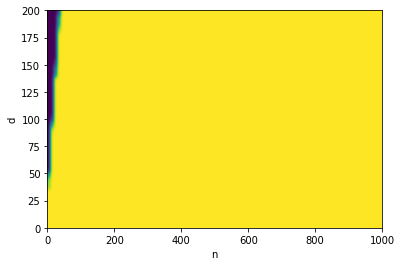

In [0]:
S_min, S_max, P_min, P_max=0,N,0,d
fig = plt.imshow(mat, interpolation="gaussian",  aspect='auto', origin = 'lower', extent=[S_min, S_max, P_min, P_max])
plt.xlabel('n')
plt.ylabel('d')

In [0]:
N,d,k, nbtest = 1000,200, 2,16
mat = phase_transition_mat(N,d,k, nbtest)# construction of the matrix with the number of success among nbtest

Text(0, 0.5, 'd')

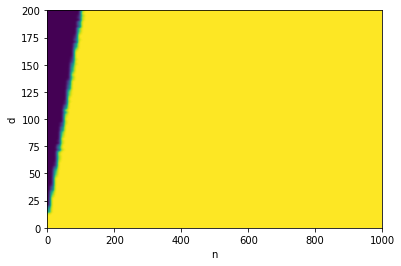

In [4]:

S_min, S_max, P_min, P_max=0,N,0,d
fig = plt.imshow(math, interpolation="gaussian",  aspect='auto', origin = 'lower', extent=[S_min, S_max, P_min, P_max])
plt.xlabel('n')
plt.ylabel('d')